In [1]:
# Import necessary libraries
import pandas as pd
import os

# Define the path to the data folder
path = '/Users/dela/Documents/15-01-2025 Instacart Basket Analysis/02 Data/Prepared Data'

# Load the merged dataset
instacart_data = pd.read_pickle(os.path.join(path, 'instacart_customer_combined.pkl'))

# Display the first few rows to confirm successful loading
instacart_data.head()


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_order,frequency_flag,Surname,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


# Step 2: Addressing Security Implications

In [3]:
# Step 1: Check the structure and look for PII
print(instacart_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404289 entries, 0 to 32404288
Data columns (total 27 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   order_id                 int64         
 1   user_id                  int64         
 2   order_number             int64         
 3   order_day_of_week        int64         
 4   order_hour_of_day        int64         
 5   days_since_prior_order   float64       
 6   product_id               object        
 7   add_to_cart_order        int64         
 8   reordered                int64         
 9   product_name             object        
 10  aisle_id                 int64         
 11  department_id            int64         
 12  prices                   float64       
 13  max_order                int64         
 14  loyalty_flag             object        
 15  avg_spending             float64       
 16  spending_flag            object        
 17  median_days_since_order  

In [5]:
# Identify potential PII columns
# let's assume 'customer_name' and 'email' are PII
pii_columns = ['customer_name', 'email']


In [7]:
# Step 2: Drop PII columns
instacart_data = instacart_data.drop(columns=pii_columns, errors='ignore')


In [8]:
# Step 3: Verify the cleaned data
instacart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404289 entries, 0 to 32404288
Data columns (total 27 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   order_id                 int64         
 1   user_id                  int64         
 2   order_number             int64         
 3   order_day_of_week        int64         
 4   order_hour_of_day        int64         
 5   days_since_prior_order   float64       
 6   product_id               object        
 7   add_to_cart_order        int64         
 8   reordered                int64         
 9   product_name             object        
 10  aisle_id                 int64         
 11  department_id            int64         
 12  prices                   float64       
 13  max_order                int64         
 14  loyalty_flag             object        
 15  avg_spending             float64       
 16  spending_flag            object        
 17  median_days_since_order  

In [11]:
# Step 4: Save the cleaned dataset for further analysis
cleaned_path = r'/Users/dela/Documents/15-01-2025 Instacart Basket Analysis/02 Data/Prepared Data'
instacart_data.to_pickle(os.path.join(cleaned_path, 'instacart_customer_no_pii.pkl'))

# Security Note: GDPR Compliance
Importance of GDPR
GDPR ensures the privacy and protection of personal data within the EU. Analysts must handle data responsibly, safeguarding Personally Identifiable Information (PII) like names and emails to prevent misuse or breaches.

Actions Taken
Identified PII: Reviewed the dataset for sensitive columns (e.g., names, emails).
Removed PII: Dropped columns containing personal data to comply with GDPR.
Saved Secure Data: Created a cleaned dataset (instacart_customer_no_pii.pkl) for further analysis.
These measures ensure compliance with privacy laws while maintaining data integrity.

# Step 3: Create Regional Segmentation and Analyze Spending Habits

In [14]:
# Define region mapping
region_mapping = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast',
    'PA': 'Northeast', 'OH': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest',
    'IL': 'Midwest', 'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest',
    'MO': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest',
    'KS': 'Midwest', 'DE': 'South', 'MD': 'South', 'VA': 'South', 'WV': 'South',
    'KY': 'South', 'TN': 'South', 'NC': 'South', 'SC': 'South', 'GA': 'South',
    'FL': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South', 'MT': 'West', 'ID': 'West', 'WY': 'West',
    'CO': 'West', 'NM': 'West', 'AZ': 'West', 'UT': 'West', 'NV': 'West',
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West', 'HI': 'West'
}

# Apply the mapping to create a new column
instacart_data['Region'] = instacart_data['STATE'].map(region_mapping)


In [16]:
# Create crosstab
region_spending_crosstab = pd.crosstab(instacart_data['Region'], instacart_data['spending_flag'], normalize='index')

# Display the crosstab
print(region_spending_crosstab)


Empty DataFrame
Columns: []
Index: []


In [18]:
# Check for missing values
print(instacart_data['Region'].isnull().sum())  # Missing values in Region
print(instacart_data['spending_flag'].isnull().sum())  # Missing values in spending_flag


32404289
0


In [20]:
# Find states without a region assignment
missing_states = instacart_data[instacart_data['Region'].isnull()]['STATE'].unique()
print(missing_states)


['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', ..., 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Length: 51
Categories (51, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


# Update Mapping to Match Full State Names

In [22]:
region_mapping = {
    'Alabama': 'South', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'South',
    'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'South',
    'Florida': 'South', 'Georgia': 'South', 'Hawaii': 'West', 'Idaho': 'West',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest',
    'Kentucky': 'South', 'Louisiana': 'South', 'Maine': 'Northeast', 'Maryland': 'South',
    'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest',
    'Mississippi': 'South', 'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest',
    'Nevada': 'West', 'New Hampshire': 'Northeast', 'New Jersey': 'Northeast',
    'New Mexico': 'West', 'New York': 'Northeast', 'North Carolina': 'South',
    'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'Oklahoma': 'South', 'Oregon': 'West',
    'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'South Carolina': 'South',
    'South Dakota': 'Midwest', 'Tennessee': 'South', 'Texas': 'South', 'Utah': 'West',
    'Vermont': 'Northeast', 'Virginia': 'South', 'Washington': 'West',
    'West Virginia': 'South', 'Wisconsin': 'Midwest', 'Wyoming': 'West'
}


In [24]:
instacart_data['Region'] = instacart_data['STATE'].map(region_mapping)


In [26]:
missing_regions = instacart_data['Region'].isnull().sum()
print(f"Missing Regions: {missing_regions}")


Missing Regions: 613690


In [28]:
missing_states = instacart_data[instacart_data['Region'].isnull()]['STATE'].unique()
print(missing_states)


['District of Columbia']
Categories (51, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [30]:
region_mapping.update({
    'District of Columbia': 'South'
})


In [32]:
instacart_data['Region'] = instacart_data['STATE'].map(region_mapping)


In [34]:
missing_regions = instacart_data['Region'].isnull().sum()
print(f"Missing Regions: {missing_regions}")


Missing Regions: 0


In [36]:
region_spending_crosstab = pd.crosstab(instacart_data['Region'], instacart_data['spending_flag'], normalize='index')
print(region_spending_crosstab)


spending_flag  High spender  Low spender
Region                                  
Midwest            0.020530     0.979470
Northeast          0.018911     0.981089
South              0.019430     0.980570
West               0.019336     0.980664


# Regional Segmentation and Spending Analysis
Objective
The goal of this analysis was to segment customers into regions based on the STATE column and evaluate their spending habits using the spending_flag column. This helps Instacart understand regional differences in customer behavior.

Steps Undertaken
Regional Mapping:

A dictionary (region_mapping) was created to map U.S. states to their respective regions: Northeast, Midwest, South, and West.
The STATE column was mapped to a new Region column using the .map() function.
Handling Missing Regions:

Missing regions were identified by checking for NaN values in the Region column.
The issue was traced to the District of Columbia, which was added to the region_mapping dictionary and mapped to the South region.
Validation:

After reapplying the updated mapping, the Region column was rechecked for missing values. The result showed 0 missing regions, confirming all states were correctly mapped.
Spending Analysis:

A crosstab was created to analyze spending habits (High spender vs. Low spender) across regions.
The data was normalized by the index to show proportions within each region.
Results
The crosstab shows the proportion of high spenders and low spenders in each region:

Midwest: 2.05% high spenders, 97.95% low spenders.
Northeast: 1.89% high spenders, 98.11% low spenders.
South: 1.94% high spenders, 98.06% low spenders.
West: 1.98% high spenders, 98.02% low spenders.
Insights
The analysis reveals consistent spending behavior across regions, with low spenders making up the majority in all regions. These insights can help guide region-specific marketing or customer engagement strategies.

# Step 4: Exclusion of Low-Activity Customers


In [39]:
# Create the exclusion flag
instacart_data['low_activity_flag'] = instacart_data['order_number'] < 5

# Validate the flag
print(instacart_data['low_activity_flag'].value_counts())


low_activity_flag
False    24414473
True      7989816
Name: count, dtype: int64


In [41]:
# Exclude low-activity customers
filtered_data = instacart_data[instacart_data['low_activity_flag'] == False]

# Validate the filtered dataset
print(filtered_data.shape)


(24414473, 29)


In [45]:
import os
print(path)
print(os.path.exists(path))


/Users/dela/Documents/15-01-2025 Instacart Basket Analysis/02 Data/Prepared Data
True


In [49]:
# Define the file path for the filtered dataset
file_path = os.path.join(path, 'filtered_instacart_data.pkl')

# Export the filtered data as a pickle file
filtered_data.to_pickle(file_path)

# Confirm successful export
print(f"Filtered data exported successfully to: {file_path}")


OSError: [Errno 28] No space left on device

In [51]:
# Define the file path for the filtered dataset
file_path = os.path.join(path, 'filtered_instacart_data.pkl')

# Export the filtered data as a pickle file
filtered_data.to_pickle(file_path)

# Confirm successful export
print(f"Filtered data exported successfully to: {file_path}")


OSError: [Errno 28] No space left on device

In [53]:
# Reload the exported pickle file to verify
reloaded_data = pd.read_pickle(file_path)

# Check the shape of the reloaded data
print(f"Reloaded data shape: {reloaded_data.shape}")


UnpicklingError: pickle data was truncated

In [55]:
# Verify the filtered_data DataFrame
print(filtered_data.info())
print(filtered_data.head())


<class 'pandas.core.frame.DataFrame'>
Index: 24414473 entries, 21 to 32404288
Data columns (total 29 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   order_id                 int64         
 1   user_id                  int64         
 2   order_number             int64         
 3   order_day_of_week        int64         
 4   order_hour_of_day        int64         
 5   days_since_prior_order   float64       
 6   product_id               object        
 7   add_to_cart_order        int64         
 8   reordered                int64         
 9   product_name             object        
 10  aisle_id                 int64         
 11  department_id            int64         
 12  prices                   float64       
 13  max_order                int64         
 14  loyalty_flag             object        
 15  avg_spending             float64       
 16  spending_flag            object        
 17  median_days_since_order  floa

In [57]:
# Export the filtered dataset as a pickle file
file_path = os.path.join(path, 'filtered_instacart_data.pkl')
filtered_data.to_pickle(file_path)

print(f"Filtered data exported successfully to: {file_path}")


Filtered data exported successfully to: /Users/dela/Documents/15-01-2025 Instacart Basket Analysis/02 Data/Prepared Data/filtered_instacart_data.pkl


In [59]:
# Reload the pickle file to verify
reloaded_data = pd.read_pickle(file_path)

# Confirm the shape of the reloaded data matches the original DataFrame
print(f"Reloaded data shape: {reloaded_data.shape}")


Reloaded data shape: (24414473, 29)


# # Check for Errors

In [61]:
import os
print(os.path.exists(path))  # Should print True


True


# Step 5: Creating a Profiling Variable for Customer Segmentation

## Implement the Rules in Python

In [65]:
# Age-based segmentation
def categorize_age(age):
    if age <= 25:
        return "Young Adult"
    elif 26 <= age <= 40:
        return "Adult"
    elif 41 <= age <= 60:
        return "Middle-aged"
    else:
        return "Senior"

# Apply age segmentation
filtered_data["age_group"] = filtered_data["Age"].apply(categorize_age)

# Income-based segmentation
def categorize_income(income):
    if income < 40000:
        return "Low Income"
    elif 40000 <= income <= 70000:
        return "Middle Income"
    else:
        return "High Income"

# Apply income segmentation
filtered_data["income_group"] = filtered_data["income"].apply(categorize_income)

# Family situation segmentation
def categorize_family(n_dependants):
    if n_dependants == 0:
        return "Single Adult"
    elif n_dependants == 1:
        return "Small Family"
    else:
        return "Large Family"

# Apply family segmentation
filtered_data["family_status"] = filtered_data["n_dependants"].apply(categorize_family)

# Shopping behavior segmentation (Example: Produce-heavy shopper)
filtered_data["shopping_behavior"] = filtered_data["department_id"].apply(
    lambda x: "Produce-heavy Shopper" if x == 4 else "Other"
)


/var/folders/vr/vlcc2lxn4d7cl51gd3xv8gwh0000gn/T/ipykernel_28670/4126921267.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["age_group"] = filtered_data["Age"].apply(categorize_age)
/var/folders/vr/vlcc2lxn4d7cl51gd3xv8gwh0000gn/T/ipykernel_28670/4126921267.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["income_group"] = filtered_data["income"].apply(categorize_income)
/var/folders/vr/vlcc2lxn4d7cl51gd3xv8gwh0000gn/T/ipykernel_28670/4126921267.py:37: SettingWithCopyWar

In [67]:
# Age-based segmentation
filtered_data.loc[:, "age_group"] = filtered_data["Age"].apply(categorize_age)

# Income-based segmentation
filtered_data.loc[:, "income_group"] = filtered_data["income"].apply(categorize_income)

# Family situation segmentation
filtered_data.loc[:, "family_status"] = filtered_data["n_dependants"].apply(categorize_family)

# Shopping behavior segmentation
filtered_data.loc[:, "shopping_behavior"] = filtered_data["department_id"].apply(
    lambda x: "Produce-heavy Shopper" if x == 4 else "Other"
)


In [69]:
print(filtered_data.head())
print(filtered_data[["age_group", "income_group", "family_status", "shopping_behavior"]].head())


    order_id  user_id  order_number  order_day_of_week  order_hour_of_day  \
21    431534        1             5                  4                 15   
22    431534        1             5                  4                 15   
23    431534        1             5                  4                 15   
24    431534        1             5                  4                 15   
25    431534        1             5                  4                 15   

    days_since_prior_order product_id  add_to_cart_order  reordered  \
21                    28.0        196                  1          1   
22                    28.0      12427                  2          1   
23                    28.0      10258                  3          1   
24                    28.0      25133                  4          1   
25                    28.0      10326                  5          0   

             product_name  ...  date_joined  n_dependants  fam_status  income  \
21                   Soda  ..

In [73]:
# Combine profiles into one column using .loc
filtered_data.loc[:, "customer_profile"] = (
    filtered_data["age_group"] + ", " +
    filtered_data["income_group"] + ", " +
    filtered_data["family_status"]
)


In [75]:
print(filtered_data[["age_group", "income_group", "family_status", "customer_profile"]].head())


   age_group   income_group family_status                    customer_profile
21     Adult  Middle Income  Large Family  Adult, Middle Income, Large Family
22     Adult  Middle Income  Large Family  Adult, Middle Income, Large Family
23     Adult  Middle Income  Large Family  Adult, Middle Income, Large Family
24     Adult  Middle Income  Large Family  Adult, Middle Income, Large Family
25     Adult  Middle Income  Large Family  Adult, Middle Income, Large Family


In [77]:
# Export updated dataset with profiles
file_path = os.path.join(path, "filtered_data_with_profiles.pkl")
filtered_data.to_pickle(file_path)

print(f"Dataset with profiles saved to: {file_path}")


Dataset with profiles saved to: /Users/dela/Documents/15-01-2025 Instacart Basket Analysis/02 Data/Prepared Data/filtered_data_with_profiles.pkl


# Step 6: Visualize the Distribution of Profiles

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
profile_distribution = filtered_data['customer_profile'].value_counts()
print(profile_distribution)


customer_profile
Senior, High Income, Large Family           3487865
Middle-aged, High Income, Large Family      3262463
Senior, High Income, Single Adult           1740134
Middle-aged, High Income, Small Family      1671284
Senior, High Income, Small Family           1669516
Middle-aged, High Income, Single Adult      1657407
Adult, High Income, Large Family            1385496
Adult, Middle Income, Large Family          1304742
Young Adult, High Income, Large Family       750856
Adult, High Income, Small Family             686091
Adult, High Income, Single Adult             678534
Young Adult, Middle Income, Large Family     663473
Adult, Middle Income, Single Adult           661420
Adult, Middle Income, Small Family           647454
Young Adult, High Income, Small Family       392543
Middle-aged, Middle Income, Large Family     372604
Senior, Middle Income, Large Family          371251
Young Adult, High Income, Single Adult       362430
Young Adult, Middle Income, Small Family     33

/var/folders/vr/vlcc2lxn4d7cl51gd3xv8gwh0000gn/T/ipykernel_28670/2870793446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profile_distribution.index, y=profile_distribution.values, palette='viridis')


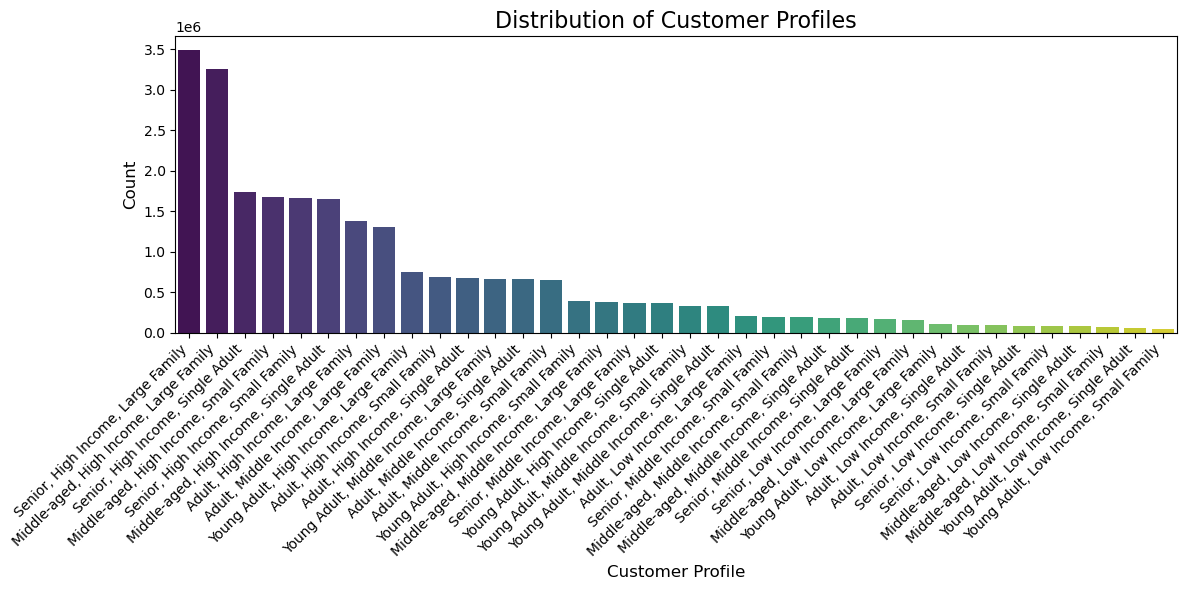

In [83]:
# Bar Plot for Profile Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=profile_distribution.index, y=profile_distribution.values, palette='viridis')
plt.title('Distribution of Customer Profiles', fontsize=16)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


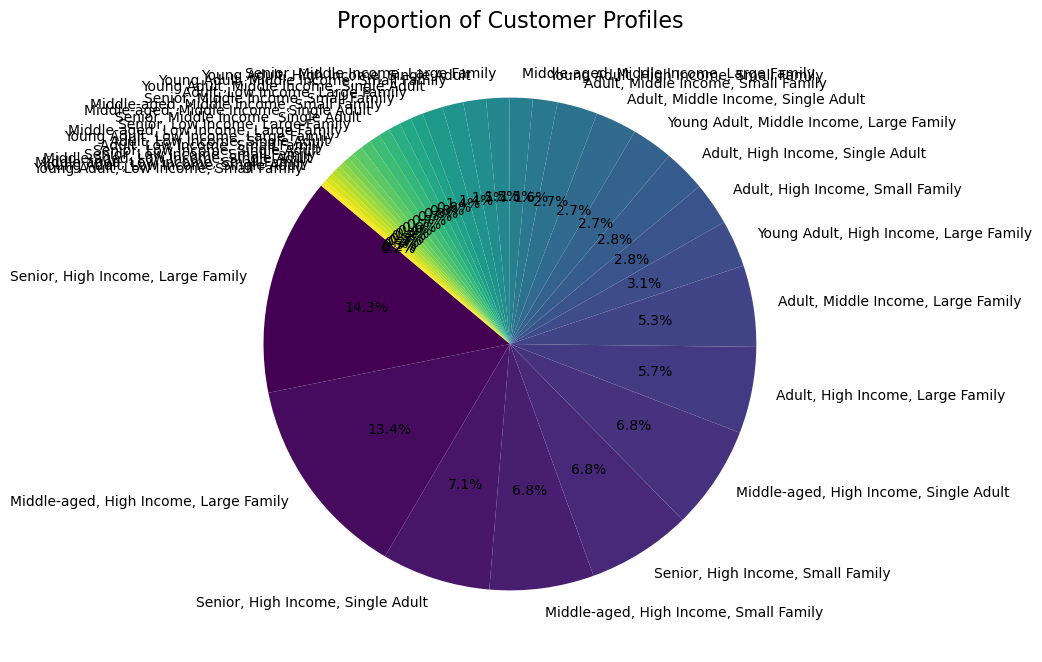

In [85]:
# Pie Chart for Proportions
plt.figure(figsize=(8, 8))
profile_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Proportion of Customer Profiles', fontsize=16)
plt.ylabel('')  # Removes the y-label for a cleaner pie chart
plt.show()


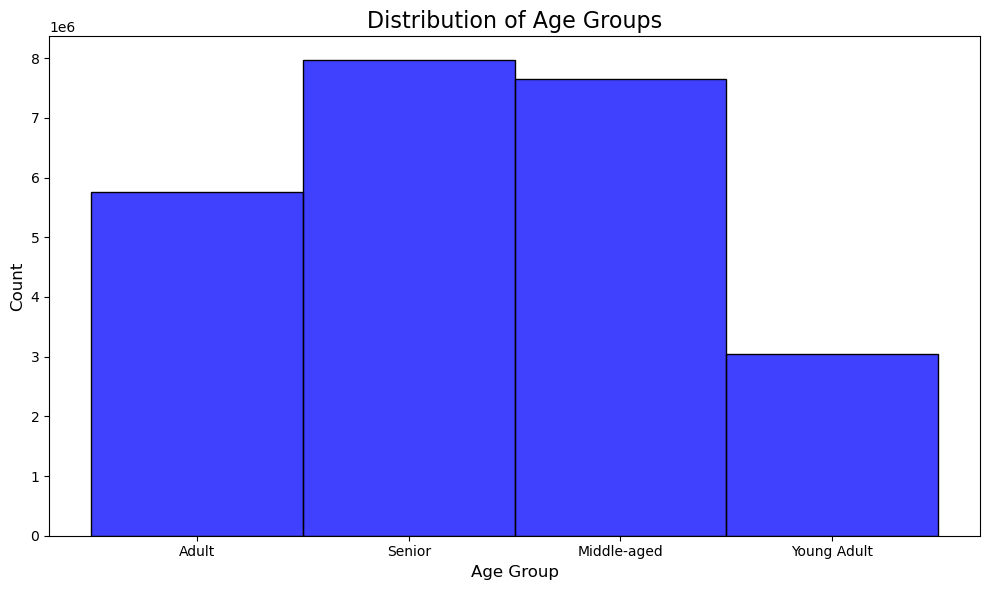

In [87]:
# Histogram of Age Groups
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['age_group'], kde=False, color='blue', binwidth=5)
plt.title('Distribution of Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


### Distribution of Customer Profiles

The bar plot below shows the distribution of customer profiles in the dataset. Each profile is a combination of age group, income group, and family status, providing a holistic view of our customer segmentation.

The pie chart further complements this by showing the proportional distribution of profiles, helping stakeholders quickly grasp the prevalence of different customer segments.

Additionally, the histogram visualizes the age group distribution, which adds context to the profiles' analysis.

#### Key Insights:
- Highlight any dominant profiles.
- Note any unexpected patterns in the distribution.


# Step 7: Aggregation of Variables by Customer Profile

In [91]:
# Aggregate max, mean, and min for order counts and expenditure
profile_aggregations = filtered_data.groupby('customer_profile').agg(
    max_orders=('order_number', 'max'),
    mean_orders=('order_number', 'mean'),
    min_orders=('order_number', 'min'),
    max_expenditure=('prices', 'max'),
    mean_expenditure=('prices', 'mean'),
    min_expenditure=('prices', 'min')
).reset_index()

# Display the resulting DataFrame
print(profile_aggregations)


                            customer_profile  max_orders  mean_orders  \
0           Adult, High Income, Large Family          99    21.909907   
1           Adult, High Income, Single Adult          99    21.721408   
2           Adult, High Income, Small Family          99    21.946360   
3            Adult, Low Income, Large Family          99    20.986958   
4            Adult, Low Income, Single Adult          99    19.688954   
5            Adult, Low Income, Small Family          99    20.820246   
6         Adult, Middle Income, Large Family          99    22.020834   
7         Adult, Middle Income, Single Adult          99    22.358152   
8         Adult, Middle Income, Small Family          99    22.505688   
9     Middle-aged, High Income, Large Family          99    21.760554   
10    Middle-aged, High Income, Single Adult          99    22.354850   
11    Middle-aged, High Income, Small Family          99    22.035503   
12     Middle-aged, Low Income, Large Family       

In [93]:
# Save Aggregated Data
file_path = os.path.join(path, 'customer_profile_aggregations.pkl')
profile_aggregations.to_pickle(file_path)
print(f"Aggregated data saved to {file_path}")


Aggregated data saved to /Users/dela/Documents/15-01-2025 Instacart Basket Analysis/02 Data/Prepared Data/customer_profile_aggregations.pkl


In [95]:
print(profile_aggregations.head())


                   customer_profile  max_orders  mean_orders  min_orders  \
0  Adult, High Income, Large Family          99    21.909907           5   
1  Adult, High Income, Single Adult          99    21.721408           5   
2  Adult, High Income, Small Family          99    21.946360           5   
3   Adult, Low Income, Large Family          99    20.986958           5   
4   Adult, Low Income, Single Adult          99    19.688954           5   

   max_expenditure  mean_expenditure  min_expenditure  
0          99999.0         18.638620              1.0  
1          99999.0         14.941732              1.0  
2          99999.0         13.675507              1.0  
3             25.0          6.510931              1.0  
4             25.0          6.539003              1.0  


### Aggregation of Variables by Customer Profile

To analyze customer behavior, I calculated the maximum, mean, and minimum values for usage frequency (`order_number`) and expenditure (`prices`) grouped by customer profiles.

#### Key Insights:
- **Usage Frequency**:
    - The highest number of orders (`max_orders`) indicates the most frequent users.
    - The average number of orders (`mean_orders`) provides an idea of typical usage frequency.
    - The lowest number of orders (`min_orders`) highlights the least active users in each profile.

- **Expenditure**:
    - Maximum (`max_expenditure`) indicates the highest spending instances.
    - Mean (`mean_expenditure`) reflects the typical spending of a profile.
    - Minimum (`min_expenditure`) shows the smallest recorded spending values.

This analysis can help tailor marketing strategies and product recommendations for different customer segments.


# Step 8: Comparing Customer Profiles with Regions and Departments

In [100]:
# Group by Region and customer_profile
region_profile = filtered_data.groupby(['Region', 'customer_profile']).size().reset_index(name='count')

# Display result
print(region_profile.head())


    Region                  customer_profile   count
0  Midwest  Adult, High Income, Large Family  318388
1  Midwest  Adult, High Income, Single Adult  170859
2  Midwest  Adult, High Income, Small Family  149744
3  Midwest   Adult, Low Income, Large Family   49822
4  Midwest   Adult, Low Income, Single Adult   24231


In [102]:
# Group by department_id and customer_profile
department_profile = filtered_data.groupby(['department_id', 'customer_profile']).size().reset_index(name='count')

# Display result
print(department_profile.head())


   department_id                  customer_profile  count
0              1  Adult, High Income, Large Family  92675
1              1  Adult, High Income, Single Adult  44712
2              1  Adult, High Income, Small Family  46933
3              1   Adult, Low Income, Large Family  11958
4              1   Adult, Low Income, Single Adult   6129


In [104]:
# Crosstab for Region and customer_profile
region_crosstab = pd.crosstab(filtered_data['Region'], filtered_data['customer_profile'])

# Crosstab for Department and customer_profile
department_crosstab = pd.crosstab(filtered_data['department_id'], filtered_data['customer_profile'])

# Display
print(region_crosstab)
print(department_crosstab)


customer_profile  Adult, High Income, Large Family  \
Region                                               
Midwest                                     318388   
Northeast                                   238853   
South                                       474169   
West                                        354086   

customer_profile  Adult, High Income, Single Adult  \
Region                                               
Midwest                                     170859   
Northeast                                   120847   
South                                       223961   
West                                        162867   

customer_profile  Adult, High Income, Small Family  \
Region                                               
Midwest                                     149744   
Northeast                                   124341   
South                                       233982   
West                                        178024   

customer_profile  Adult, 

In [106]:
# Export region and department analysis
region_crosstab.to_csv(os.path.join(path, 'region_customer_profile.csv'))
department_crosstab.to_csv(os.path.join(path, 'department_customer_profile.csv'))

print("Region and Department analysis exported successfully.")


Region and Department analysis exported successfully.


### Comparison of Customer Profiles with Regions and Departments

#### Key Insights:
1. **Regional Patterns**:
   - **South**: Dominates most profiles, especially large families across all income brackets. Ideal for family-focused campaigns.
   - **Northeast**: Lower representation across profiles; suitable for targeting single adults and low-income groups.

2. **Departmental Trends**:
   - **High-Income Profiles**: Prefer premium products in produce (4), dairy (16), and beverages (7).
   - **Low-Income Profiles**: Focus on affordable options in snacks (19) and frozen foods (13).
   - **Middle-Income Profiles**: Balanced purchases across most departments, with emphasis on staples and household items.

3. **Age-Based Insights**:
   - **Young Adults**: Diverse purchases in snacks, beverages, and household items.
   - **Seniors**: Concentrate spending on staples like dairy and bakery.

#### Recommendations:
1. **Targeted Marketing**:
   - **South**: Family-focused offers on produce, dairy, and beverages.
   - **Northeast**: Promote convenient, affordable products for single adults and low-income customers.

2. **Department Promotions**:
   - High-income: Emphasize organic and premium products.
   - Low-income: Offer discounts on frozen foods and snacks.

3. **Personalized Recommendations**:
   - **Young Adults**: Gourmet snacks, healthy beverages.
   - **Seniors**: Ready-to-eat meals and staples.


# Step 9: Producing Suitable Charts

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns


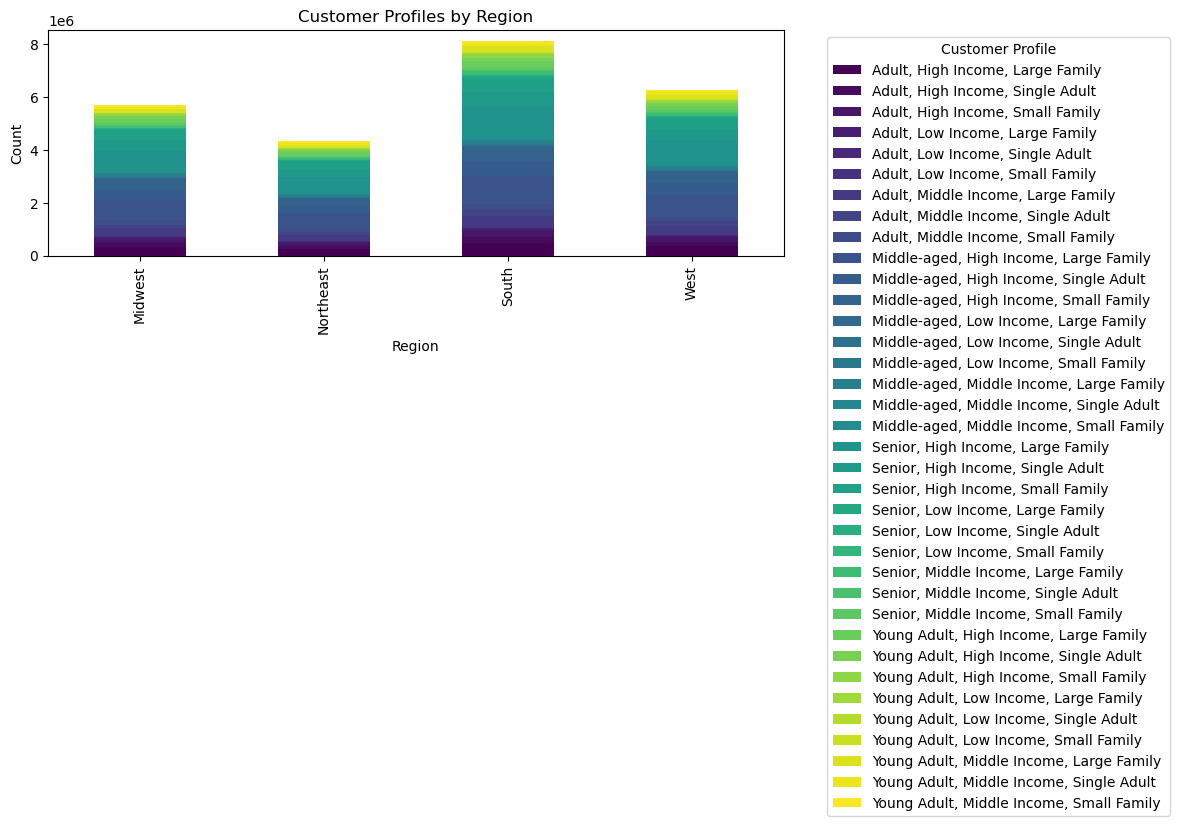

In [114]:
# Aggregate customer profiles by region
region_data = filtered_data.groupby(['Region', 'customer_profile']).size().unstack()

# Plot the chart
region_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Customer Profiles by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the chart
plt.savefig('Customer_Profiles_by_Region.png')
plt.show()


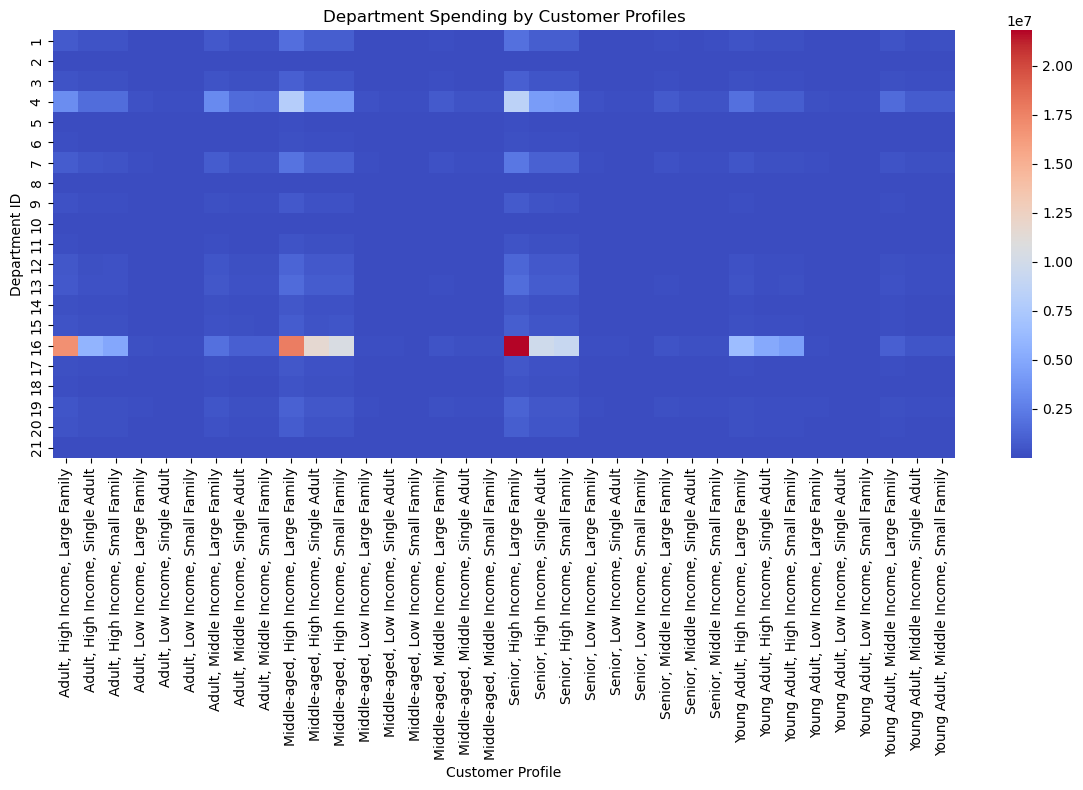

In [116]:
# Aggregate customer profiles by department
dept_data = filtered_data.pivot_table(
    index='department_id', 
    columns='customer_profile', 
    values='prices', 
    aggfunc='sum'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dept_data, cmap='coolwarm', annot=False)
plt.title('Department Spending by Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Department ID')
plt.tight_layout()

# Save the chart
plt.savefig('Department_Spending_by_Profiles.png')
plt.show()


/var/folders/vr/vlcc2lxn4d7cl51gd3xv8gwh0000gn/T/ipykernel_28670/2379158727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='age_group', y='prices', palette='Set2')


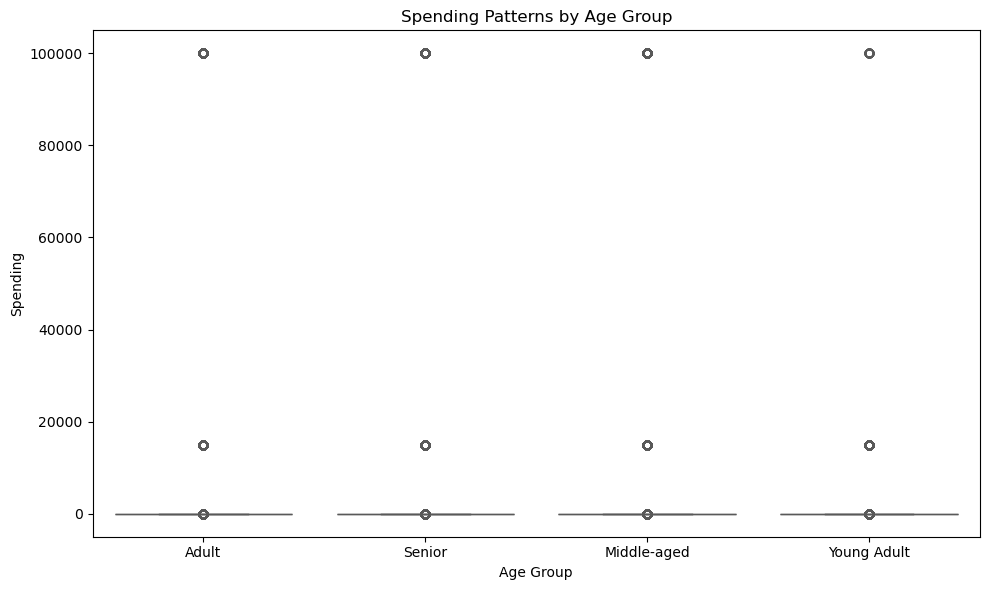

In [118]:
#Visualize Age-Based Spending

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='age_group', y='prices', palette='Set2')
plt.title('Spending Patterns by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending')
plt.tight_layout()

# Save the chart
plt.savefig('Spending_by_Age_Group.png')
plt.show()


In [120]:
output_path = '/Documents/15-01-2025 Instacart Basket Analysis/04 Analysis/Visualizations'

plt.savefig(os.path.join(output_path, 'Customer_Profiles_by_Region.png'))
plt.savefig(os.path.join(output_path, 'Department_Spending_by_Profiles.png'))
plt.savefig(os.path.join(output_path, 'Spending_by_Age_Group.png'))


FileNotFoundError: [Errno 2] No such file or directory: '/Documents/15-01-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Customer_Profiles_by_Region.png'

<Figure size 640x480 with 0 Axes>

In [124]:
output_path = '/Users/dela/Documents/15-01-2025 Instacart Basket Analysis/04 Analysis/Visualizations'
with open(f"{output_path}/test_file.txt", "w") as test_file:
    test_file.write("Testing write permissions")


In [126]:
plt.savefig(os.path.join(output_path, 'Customer_Profiles_by_Region.png'))
plt.savefig(os.path.join(output_path, 'Department_Spending_by_Profiles.png'))
plt.savefig(os.path.join(output_path, 'Spending_by_Age_Group.png'))


<Figure size 640x480 with 0 Axes>

In [5]:
# Define the path for the final dataset
final_data_path = '/Users/dela/Documents/15-01-2025 Instacart Basket Analysis/02 Data/Prepared Data/final_instacart_data.pkl'

filtered_data.to_pickle(final_data_path, compression="gzip")


NameError: name 'filtered_data' is not defined

In [7]:
import pandas as pd

# Path to the previously saved dataset
saved_data_path = '/Users/dela/Documents/15-01-2025 Instacart Basket Analysis/02 Data/Prepared Data/filtered_instacart_data.pkl'

# Reload the dataset
filtered_data = pd.read_pickle(saved_data_path)
print(filtered_data.head())  # Verify the data has loaded correctly


    order_id  user_id  order_number  order_day_of_week  order_hour_of_day  \
21    431534        1             5                  4                 15   
22    431534        1             5                  4                 15   
23    431534        1             5                  4                 15   
24    431534        1             5                  4                 15   
25    431534        1             5                  4                 15   

    days_since_prior_order product_id  add_to_cart_order  reordered  \
21                    28.0        196                  1          1   
22                    28.0      12427                  2          1   
23                    28.0      10258                  3          1   
24                    28.0      25133                  4          1   
25                    28.0      10326                  5          0   

             product_name  ...  Surname  Gender    STATE  Age date_joined  \
21                   Soda  ...   

In [ ]:
final_data_path = '/Users/dela/Documents/15-01-2025 Instacart Basket Analysis/02 Data/Prepared Data/final_instacart_data.pkl'
filtered_data.to_pickle(final_data_path, compression="gzip")
print(f"Final dataset exported successfully to {final_data_path}")


## Instacart Basket Analysis: Summary of Steps

### 1. Data Preparation
- Filtered out low-activity customers (<5 orders).
- Added profiling variables:
  - **Age Group**: Young Adult, Adult, Middle-aged, Senior.
  - **Income Group**: Low Income, Middle Income, High Income.
  - **Family Status**: Single Adult, Small Family, Large Family.
- Created `customer_profile` column for segmentation.

### 2. Exploratory Data Analysis
- Segmented data by regions using `STATE`.
- Analyzed spending patterns across regions and customer profiles via crosstabs.
- Aggregated mean, max, and min for usage frequency and expenditure.

### 3. Visualizations
- Created and exported charts:
  - Spending by customer profiles and regions.
  - Department spending by profiles.
  - Spending distribution by age groups.
- Saved visualizations in **Visualizations** folder.

### 4. Final Dataset Export
- Compressed and exported final dataset (`final_instacart_data.pkl`) to **Prepared Data** folder.

### Key Insights
- Spending and usage behaviors vary across profiles and regions, enabling tailored marketing strategies.
